# NAME= ARBAJ SHAIKH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
X=pd.read_csv('Advertising.csv',index_col=0)

X

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
x=X[['TV']]
y=X[['Sales']]


In [4]:
x=sm.add_constant(x)

C:\Users\Arbaj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
reg=sm.OLS(y,x)
model=reg.fit()
y_pred=model.predict(x)


In [6]:
y_mean=X['Sales'].mean()


In [7]:
squared_error=pd.Series((y_mean-X['Sales'])**2)
pred_error=pd.Series((y_pred-X['Sales']))**2

In [8]:
SSE_mean=np.sum((y_mean-X['Sales'])**2)
SSE_pred=np.sum((y_pred-X['Sales'])**2)
SSE_mean,SSE_pred

(5417.14875, 2102.530583131351)

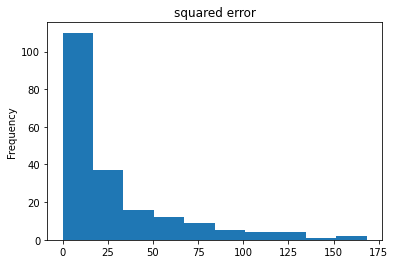

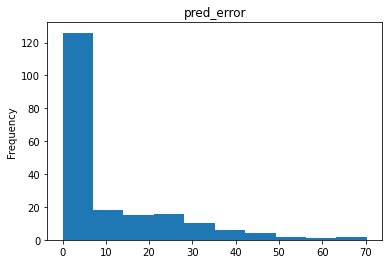

In [9]:
squared_error.plot(kind='hist')
plt.title('squared error')
plt.show()
pred_error.plot(kind='hist')
plt.title('pred_error')
plt.show()

In [10]:
(SSE_mean-SSE_pred)/SSE_mean

0.6118750508500711

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE=mean_squared_error(y_pred,y)
MAE=mean_absolute_error(y_pred,y)
MSE,MAE

(10.512652915656753, 2.549806038927487)

In [12]:
RMSE=np.sqrt(MSE)
RMSE

3.2423221486546883

In [13]:
r_square=1 - (SSE_pred/SSE_mean)
r_square

0.6118750508500712

In [14]:
#Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

#where:

#R2: The R2 of the model= (model.score(x, y)) but this isnt in OLS so use (r_square)
#n: The number of observations
#k: The number of predictor variables

Adjusted_r2= 1 - (1-r_square)*(len(y)-1)/(len(y)-x.shape[1]-1)
Adjusted_r2

0.6079346960363663

In [15]:
print(MSE,MAE,RMSE,r_square,Adjusted_r2)

10.512652915656753 2.549806038927487 3.2423221486546883 0.6118750508500712 0.6079346960363663


In [16]:
xr=X[['Radio']]
yr=X[['Sales']]

In [17]:
xr=sm.add_constant(xr)

C:\Users\Arbaj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
regr=sm.OLS(yr,xr)
modelr=regr.fit()
yr_pred=modelr.predict(xr)

In [19]:
yr_mean=X['Sales'].mean()
SSEr_mean=np.sum((yr_mean-X['Sales'])**2)
SSEr_pred=np.sum((yr_pred-X['Sales'])**2)
SSEr_mean,SSEr_pred

(5417.14875, 3618.4795490250876)

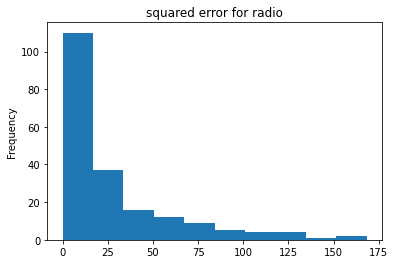

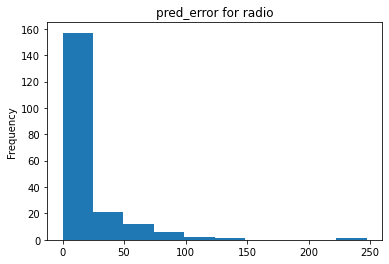

In [20]:
sq_er=pd.Series((yr_mean-X['Sales'])**2)
pr_er=pd.Series((yr_pred-X['Sales'])**2)
sq_er.plot(kind='hist')
plt.title('squared error for radio')
plt.show()
pr_er.plot(kind='hist')
plt.title('pred_error for radio')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSEr=mean_squared_error(yr,yr_pred)
MAEr=mean_absolute_error(yr,yr_pred)
MSEr,MAEr

(18.09239774512544, 3.320218797642066)

In [22]:
rmser=np.sqrt(MSEr)
rmser

4.2535159274564185

In [23]:
r_squarer=1-(SSEr_pred/SSEr_mean)
r_squarer


0.33203245544529536

In [24]:
adj_r_square_for_radio=1-(1-r_squarer)*(len(yr)-1)/(len(yr)-xr.shape[1]-1)
adj_r_square_for_radio

0.32525105905387697

In [25]:
print(MSEr,MAEr,rmser,r_squarer,adj_r_square_for_radio)

18.09239774512544 3.320218797642066 4.2535159274564185 0.33203245544529536 0.32525105905387697


In [26]:
xn=X[['Newspaper']]
yn=X[['Sales']]


In [27]:
xn=sm.add_constant(xn)

C:\Users\Arbaj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
regn=sm.OLS(yn,xn)
modeln=regn.fit()
yn_pred=modeln.predict(xn)

In [29]:
yn_mean=X['Sales'].mean()

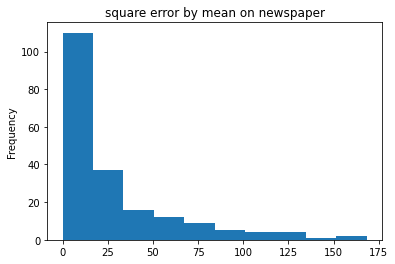

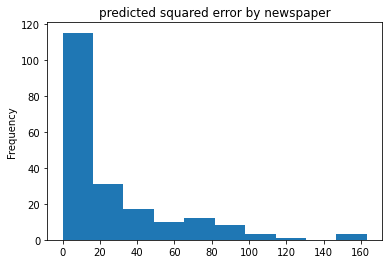

In [30]:
sq_en=pd.Series((yn_mean-X['Sales'])**2)
pred_en=pd.Series((yn_pred-X['Sales'])**2)
sq_en.plot(kind='hist')
plt.title('square error by mean on newspaper')
plt.show()
pred_en.plot(kind='hist')
plt.title('predicted squared error by newspaper')
plt.show()

In [31]:
SSE_MN=np.sum(((yn_mean-X['Sales'])**2))
SSE_PN=np.sum((yn_pred-X['Sales'])**2)
SSE_MN,SSE_PN

(5417.14875, 5134.804544111939)

In [32]:
r_squaren=1-(SSE_PN/SSE_MN)
r_squaren

0.05212044544430516

In [33]:
MSE_N=mean_squared_error(yn,yn_pred)
MAE_N=mean_absolute_error(yn,yn_pred)
MSE_N,MAE_N

(25.674022720559698, 4.1465597438384885)

In [34]:
RMSE_N=np.sqrt(MSE_N)
RMSE_N

5.066953988399707

In [35]:
ADJ_Rn=1-(1-r_squaren)*(len(y)-1)/(len(y)-xn.shape[1]-1)
ADJ_Rn

0.04249730275846053

In [36]:
print(MSE_N,MAE_N,r_squaren,RMSE_N,ADJ_Rn)

25.674022720559698 4.1465597438384885 0.05212044544430516 5.066953988399707 0.04249730275846053


In [37]:
X

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


<AxesSubplot:>

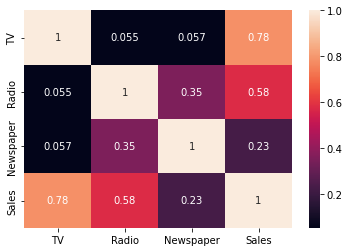

In [38]:
sns.heatmap(X.corr(),annot=True)

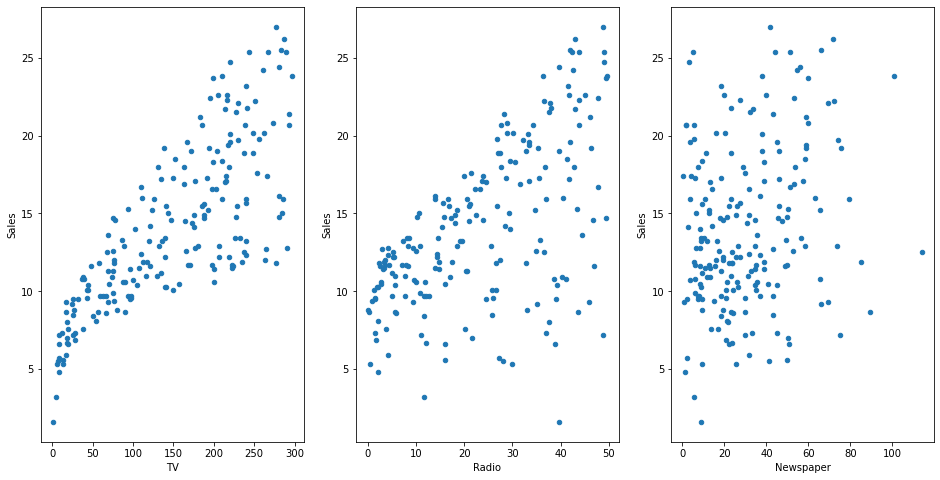

In [39]:
fig,axs=plt.subplots(1,3)
X.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
X.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
X.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2]);




In [40]:
x_values1=X[['TV']].values
y_values1=X[['Sales']].values


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values1,y_values1, random_state = 6)

In [42]:
from sklearn.linear_model import LinearRegression
A=LinearRegression()
model1v=A.fit(X_train,y_train)
y_pred1=model1v.predict(X_test)
y_pred1[1]                               #see this after stats model it is changed and reduced

array([17.17250484])

In [101]:
y_predtr=model1v.predict(X_train)
MSEtr=mean_squared_error(y_predtr,y_train)
MAEtr=mean_absolute_error(y_predtr,y_train)
rmsetr=np.sqrt(MSEtr)
sctr=model.score(X_train,y_train)

MSEtr,MAEtr,rmsert,scrt

AttributeError: 'OLSResults' object has no attribute 'score'

In [43]:
model1v.intercept_

array([6.70910349])

In [44]:
model1v.coef_

array([[0.04873499]])

In [45]:
o1=pd.DataFrame({'TV':[X.TV.min(),X.TV.max()]})
o1

,TV
0,0.7
1,296.4


In [46]:
o1_pred=model1v.predict(o1)

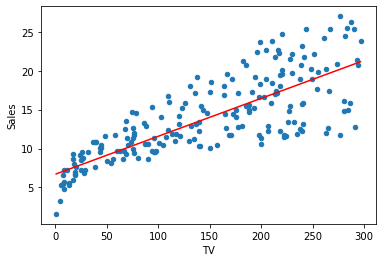

In [47]:
X.plot(kind='scatter',x="TV",y='Sales')
plt.plot(o1,o1_pred,color='red')

In [48]:
import statsmodels.formula.api as smf

In [49]:
stats1model=smf.ols(formula='Sales ~ TV',data=X).fit()
stats1model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### H0 : There is no relationship between independent(TV) variable and dependent(sales) variable

### H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

In [50]:
stats1model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.47e-42
Time:                        08:15:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
stats1_pred=model1v.predict(X_test)
stats1_pred[1]                                 #see above y_pred1 value and notice differernce

array([17.17250484])

In [52]:
MAE_1=mean_absolute_error(stats1_pred,y_test)
MAE_1

2.469197684055691

In [53]:
MSE_1=mean_squared_error(stats1_pred,y_test)
MSE_1

9.503191696866343

In [54]:
RMSE_1=np.sqrt(MSE_1)
RMSE_1

3.0827247196054244

In [55]:
R_SQUARE_1=model1v.score(X_test,y_test)
R_SQUARE_1

0.5600153407297688

In [56]:
ADJ_R_1=1-(1-R_SQUARE_1)*(len(y_values1)-1)/(len(y_values1)-x_values1.shape[1]-1)
ADJ_R_1

0.5577931959859797

In [57]:
x_values2=X[['Radio']].values
y_values2=X[['Sales']].values

In [58]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(x_values2,y_values2)

In [59]:
from sklearn.linear_model import LinearRegression
B=LinearRegression()
model2v=B.fit(X_train2,y_train2)
y_pred2=model2v.predict(X_test2)
y_pred2[1]

array([9.72770803])

In [60]:
model2v.intercept_

array([9.57803798])

In [61]:
model2v.coef_

array([[0.18708756]])

In [62]:
o2=pd.DataFrame({'Radio':[X.Radio.min(),X.Radio.max()]})
o2

,Radio
0,0.0
1,49.6


In [63]:
o2_pred=model2v.predict(o2)

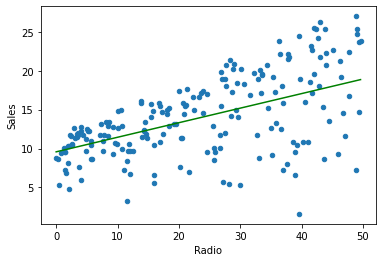

In [64]:
X.plot(kind='scatter',x='Radio',y='Sales')
plt.plot(o2,o2_pred,color='green')


In [65]:
import statsmodels.formula.api as smf
stats2model=smf.ols(formula='Radio ~ Sales',data=X).fit()
stats2model.pvalues

Intercept    9.127239e-01
Sales        4.354966e-19
dtype: float64

In [66]:
stats2model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Radio   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 02 May 2022   Prob (F-statistic):           4.35e-19
Time:                        08:15:56   Log-Likelihood:                -782.49
No. Observations:                 200   AIC:                             1569.
Df Residuals:                     198   BIC:                             1576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2713      2.472      0.110      0.913      -4.604       5.146
Sales          1.6397      0.165      9.921      0.000       1.314       1.966
==============================================================================
Omnibus:                       15.769   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.838
Skew:                           0.732   Prob(JB):                     0.000134
Kurtosis:                       2.991   Cond. No.                         43.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### H0 : There is no relationship between independent(TV) variable and dependent(sales) variable
### H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

In [67]:
stats2_pred=model2v.predict(X_test2)
stats2_pred[1]

array([9.72770803])

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
MSE_2=mean_squared_error(stats2_pred,y_test2)
MSE_2

17.691379755402217

In [70]:
MAE_2=mean_absolute_error(stats2_pred,y_test2)
MAE_2

3.3294108885123608

In [71]:
RMSE_2=np.sqrt(MSE_2)
RMSE_2

4.2061121900636715

In [72]:
R_SQUARE_2=model2v.score(X_test2,y_test2)
R_SQUARE_2

0.41334389799883253

In [73]:
ADJ_R_2=1-(1-R_SQUARE_2)*(len(y_values2)-1)/(len(y_values2)-x_values2.shape[1]-1)
ADJ_R_2

0.41038098839276604

In [74]:
x_values3=X[['Newspaper']].values
y_values3=X[['Sales']].values

In [75]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(x_values3,y_values3)

In [76]:
from sklearn.linear_model import LinearRegression
C=LinearRegression()
model3v=C.fit(X_train3,y_train3)
y_pred3=model3v.predict(X_test3)
y_pred3[1]

array([12.71051342])

In [77]:
model3v.intercept_

array([11.43453637])

In [78]:
model3v.coef_

array([[0.07686609]])

In [79]:
o3=pd.DataFrame({'Newspaper':[X.Newspaper.min(),X.Newspaper.max()]})
o3

,Newspaper
0,0.3
1,114.0


In [80]:
o3_pred=model3v.predict(o3)

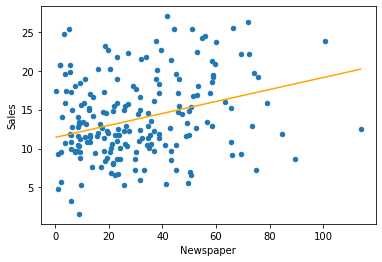

In [81]:
X.plot(kind='scatter',x='Newspaper',y='Sales')
plt.plot(o3,o3_pred,color='orange')

In [82]:
import statsmodels.formula.api as smf
stats3model=smf.ols(formula='Newspaper ~ Sales',data=X).fit()
stats3model.pvalues

Intercept    0.000097
Sales        0.001148
dtype: float64

In [83]:
stats3model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Newspaper   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 02 May 2022   Prob (F-statistic):            0.00115
Time:                        08:15:56   Log-Likelihood:                -894.12
No. Observations:                 200   AIC:                             1792.
Df Residuals:                     198   BIC:                             1799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1911      4.320      3.980      0.000       8.672      25.710
Sales          0.9530      0.289      3.300      0.001       0.383       1.523
==============================================================================
Omnibus:                       24.387   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.955
Skew:                           0.834   Prob(JB):                     3.13e-07
Kurtosis:                       3.902   Cond. No.                         43.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
stats3_pred=model3v.predict(X_test3)
stats3_pred[1]

array([12.71051342])

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [86]:
MAE_3=mean_absolute_error(y_test3,stats3_pred)
MAE_3

3.8892062586587333

In [87]:
MSE_3=mean_squared_error(y_test3,stats3_pred)
MSE_3

23.90751604901559

In [88]:
RMSE_3=np.sqrt(MSE_3)
RMSE_3

4.889531270890451

In [89]:
R_SQUARE_3=model3v.score(X_test3,y_test3)
R_SQUARE_3

-0.22059924165983147

In [90]:
ADJ_R_3=1-(1-R_SQUARE_3)*(len(y_values3)-1)/(len(y_values3)-x_values3.shape[1]-1)
ADJ_R_3

-0.22676388429447702

In [91]:
R1=['TV',MAE,MSE,RMSE,r_square,Adjusted_r2]   #TV
R2=['RADIO',MAEr,MSEr,rmser,r_squarer,adj_r_square_for_radio]   #RADIO
R3=['NEWSPAPER',MAE_N,MSE_N,RMSE_N,r_squaren,ADJ_Rn]     #NEWSPAPER

In [92]:
ROLS=[R1,R2,R3]

ROLS1=np.transpose(ROLS)
ROLS1

array([['TV', 'RADIO', 'NEWSPAPER'],
       ['2.549806038927487', '3.320218797642066', '4.1465597438384885'],
       ['10.512652915656753', '18.09239774512544', '25.674022720559698'],
       ['3.2423221486546883', '4.2535159274564185', '5.066953988399707'],
       ['0.6118750508500712', '0.33203245544529536',
        '0.05212044544430516'],
       ['0.6079346960363663', '0.32525105905387697',
        '0.04249730275846053']], dtype='<U32')

In [93]:
r1=['TV',MAE_1,MSE_1,RMSE_1,R_SQUARE_1,ADJ_R_1]
r2=['RADIO',MAE_2,MSE_2,RMSE_2,R_SQUARE_2,ADJ_R_2]
r3=['NEWSPAPER',MAE_3,MSE_3,RMSE_3,R_SQUARE_3,ADJ_R_3]


In [94]:
RSKL=[r1,r2,r3]
RSKL1=np.transpose(RSKL)
RSKL1

array([['TV', 'RADIO', 'NEWSPAPER'],
       ['2.469197684055691', '3.3294108885123608', '3.8892062586587333'],
       ['9.503191696866343', '17.691379755402217', '23.90751604901559'],
       ['3.0827247196054244', '4.2061121900636715', '4.889531270890451'],
       ['0.5600153407297688', '0.41334389799883253',
        '-0.22059924165983147'],
       ['0.5577931959859797', '0.41038098839276604',
        '-0.22676388429447702']], dtype='<U32')

In [95]:
nn=pd.DataFrame(RSKL1,columns=['','SKLEARN',''],index=['','MAE','MSE','RMSE','R SQUARE','ADJ R SQUARE'])
nn

,,SKLEARN,
,TV,RADIO,NEWSPAPER
MAE,2.469197684055691,3.3294108885123608,3.8892062586587333
MSE,9.503191696866343,17.691379755402217,23.90751604901559
RMSE,3.0827247196054244,4.2061121900636715,4.889531270890451
R SQUARE,0.5600153407297688,0.41334389799883253,-0.22059924165983147
ADJ R SQUARE,0.5577931959859797,0.41038098839276604,-0.22676388429447702


In [96]:
mm=pd.DataFrame(ROLS1,columns=['','OLS',''],index=['','MAE','MSE','RMSE','R SQUARE','ADJ R SQUARE'])
mm

,,OLS,
,TV,RADIO,NEWSPAPER
MAE,2.549806038927487,3.320218797642066,4.1465597438384885
MSE,10.512652915656753,18.09239774512544,25.674022720559698
RMSE,3.2423221486546883,4.2535159274564185,5.066953988399707
R SQUARE,0.6118750508500712,0.33203245544529536,0.05212044544430516
ADJ R SQUARE,0.6079346960363663,0.32525105905387697,0.04249730275846053


In [97]:
result=pd.concat([mm,nn], axis=1)
result

,,OLS,,,SKLEARN,
,TV,RADIO,NEWSPAPER,TV,RADIO,NEWSPAPER
MAE,2.549806038927487,3.320218797642066,4.1465597438384885,2.469197684055691,3.3294108885123608,3.8892062586587333
MSE,10.512652915656753,18.09239774512544,25.674022720559698,9.503191696866343,17.691379755402217,23.90751604901559
RMSE,3.2423221486546883,4.2535159274564185,5.066953988399707,3.0827247196054244,4.2061121900636715,4.889531270890451
R SQUARE,0.6118750508500712,0.33203245544529536,0.05212044544430516,0.5600153407297688,0.41334389799883253,-0.22059924165983147
ADJ R SQUARE,0.6079346960363663,0.32525105905387697,0.04249730275846053,0.5577931959859797,0.41038098839276604,-0.22676388429447702


# THANK YOU
### LEARNT ALOT WHILE CREATING THE DATAFRAME AMAZING EXPERIENCE

In [98]:
r1

['TV',
 2.469197684055691,
 9.503191696866343,
 3.0827247196054244,
 0.5600153407297688,
 0.5577931959859797]